<a href="https://colab.research.google.com/github/antonsysoev/Intelligent_Data_Analysis/blob/main/Lecture_14_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c("tidyverse", "neuralnet", "caret", "ggplot2"))

# Загрузка библиотек
library(tidyverse)
library(caret)
library(neuralnet)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘Deriv’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching pack

In [2]:
# Используем встроенный датасет Boston из MASS
data(Boston, package = "MASS")
df <- Boston

# Проверим данные
str(df)
summary(df)

# Разделим данные на обучающую и тестовую выборки (70%/30%)
set.seed(123)
train_index <- createDataPartition(df$medv, p = 0.7, list = FALSE)
train_data <- df[train_index, ]
test_data <- df[-train_index, ]

# Масштабирование данных для нейронной сети
preprocess_params <- preProcess(train_data, method = c("center", "scale"))
train_scaled <- predict(preprocess_params, train_data)
test_scaled <- predict(preprocess_params, test_data)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [3]:
# МОДЕЛЬ МНОЖЕСТВЕННОЙ ЛИНЕЙНОЙ РЕГРЕССИИ

# Построение модели со всеми предикторами
lm_model <- lm(medv ~ ., data = train_data)
summary(lm_model)

# Прогнозы на тестовых данных
lm_predictions <- predict(lm_model, newdata = test_data)

# Оценка качества модели
lm_rmse <- RMSE(lm_predictions, test_data$medv)
lm_mae <- MAE(lm_predictions, test_data$medv)
lm_r2 <- cor(lm_predictions, test_data$medv)^2

cat("Linear Regression Results:\n")
cat("RMSE:", round(lm_rmse, 3), "\n")
cat("MAE:", round(lm_mae, 3), "\n")
cat("R-squared:", round(lm_r2, 3), "\n")


Call:
lm(formula = medv ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.491  -2.753  -0.499   1.942  24.549 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.593363   5.735441   5.857 1.11e-08 ***
crim         -0.091542   0.038713  -2.365 0.018605 *  
zn            0.029760   0.016233   1.833 0.067624 .  
indus        -0.043242   0.070898  -0.610 0.542320    
chas          2.911364   0.997890   2.918 0.003762 ** 
nox         -16.335169   4.467780  -3.656 0.000296 ***
rm            3.964627   0.458191   8.653  < 2e-16 ***
age           0.001477   0.015580   0.095 0.924507    
dis          -1.271695   0.230636  -5.514 6.93e-08 ***
rad           0.276750   0.074258   3.727 0.000227 ***
tax          -0.010817   0.004152  -2.605 0.009589 ** 
ptratio      -0.928753   0.152052  -6.108 2.74e-09 ***
black         0.008713   0.002988   2.916 0.003781 ** 
lstat        -0.484062   0.062091  -7.796 7.77e-14 ***
---
Signif. codes

Linear Regression Results:
RMSE: 5.102 
MAE: 3.31 
R-squared: 0.721 


In [4]:
# РЕГРЕССИЯ С ВЗАИМОДЕЙСТВИЯМИ

# Создадим модель с взаимодействиями между ключевыми переменными
# Взаимодействия: rm (комнаты) * lstat (процент населения низкого статуса)
# и age (возраст) * dis (расстояние до рабочих центров)
int_model <- lm(medv ~ . + rm:lstat + age:dis, data = train_data)
summary(int_model)

# Прогнозы на тестовых данных
int_predictions <- predict(int_model, newdata = test_data)

# Оценка качества модели
int_rmse <- RMSE(int_predictions, test_data$medv)
int_mae <- MAE(int_predictions, test_data$medv)
int_r2 <- cor(int_predictions, test_data$medv)^2

cat("Interaction Model Results:\n")
cat("RMSE:", round(int_rmse, 3), "\n")
cat("MAE:", round(int_mae, 3), "\n")
cat("R-squared:", round(int_r2, 3), "\n")


Call:
lm(formula = medv ~ . + rm:lstat + age:dis, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.1767  -2.0910  -0.2512   1.8017  24.6478 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.905158   5.517805   0.708  0.47959    
crim         -0.152404   0.033565  -4.541 7.80e-06 ***
zn            0.011027   0.014944   0.738  0.46107    
indus        -0.008325   0.061929  -0.134  0.89314    
chas          2.185682   0.851850   2.566  0.01072 *  
nox         -16.071931   3.934591  -4.085 5.51e-05 ***
rm            7.913258   0.533994  14.819  < 2e-16 ***
age           0.048967   0.026715   1.833  0.06768 .  
dis          -0.583215   0.341853  -1.706  0.08891 .  
rad           0.298383   0.063433   4.704 3.72e-06 ***
tax          -0.011234   0.003543  -3.171  0.00166 ** 
ptratio      -0.679228   0.131349  -5.171 3.98e-07 ***
black         0.003717   0.002568   1.447  0.14870    
lstat         1.733459   0.206261   8.404

Interaction Model Results:
RMSE: 4.584 
MAE: 2.911 
R-squared: 0.773 


In [5]:

# НЕЙРОННАЯ СЕТЬ

# Подготовка формулу для нейронной сети
# Используем масштабированные данные
nn_formula <- as.formula(paste("medv ~",
                               paste(names(train_scaled)[!names(train_scaled) %in% "medv"],
                                     collapse = " + ")))

# Построение нейронной сети с одним скрытым слоем (7 нейронов)
set.seed(123)
nn_model <- neuralnet(
  nn_formula,
  data = train_scaled,
  hidden = 7,          # Один скрытый слой с 7 нейронами
  linear.output = TRUE, # Для регрессии
  threshold = 0.01,    # Порог для остановки обучения
  stepmax = 1e5        # Максимальное количество шагов
)

# Визуализация архитектуры сети
plot(nn_model)

# Прогнозы на тестовых данных (масштабированных)
nn_predictions_scaled <- predict(nn_model, test_scaled)

# Обратное масштабирование предсказаний
# Получаем параметры масштабирования для medv
medv_mean <- preprocess_params$mean["medv"]
medv_sd <- preprocess_params$std["medv"]

# Обратное преобразование
nn_predictions <- nn_predictions_scaled * medv_sd + medv_mean

# Оценка качества модели
nn_rmse <- RMSE(nn_predictions, test_data$medv)
nn_mae <- MAE(nn_predictions, test_data$medv)
nn_r2 <- cor(nn_predictions, test_data$medv)^2

cat("Neural Network Results:\n")
cat("RMSE:", round(nn_rmse, 3), "\n")
cat("MAE:", round(nn_mae, 3), "\n")
cat("R-squared:", round(nn_r2, 3), "\n")

Neural Network Results:
RMSE: 4.055 
MAE: 2.722 
R-squared: 0.822 


                         Model     RMSE      MAE R_squared
1            Linear Regression 5.101768 3.309770 0.7207317
2 Regression with Interactions 4.584361 2.910692 0.7727487
3               Neural Network 4.054914 2.722436 0.8220162


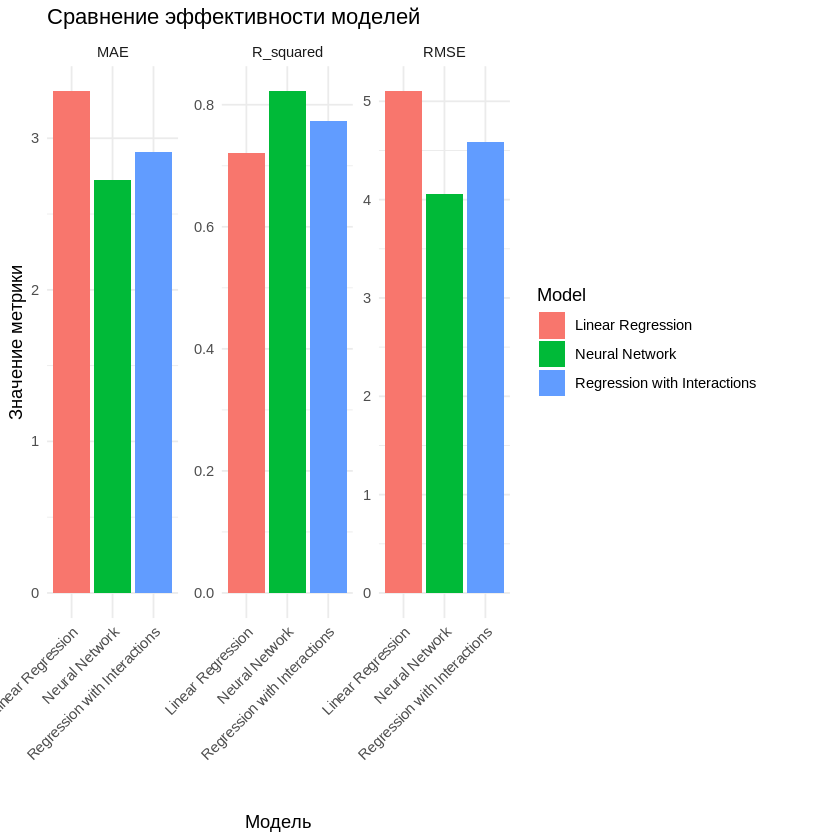

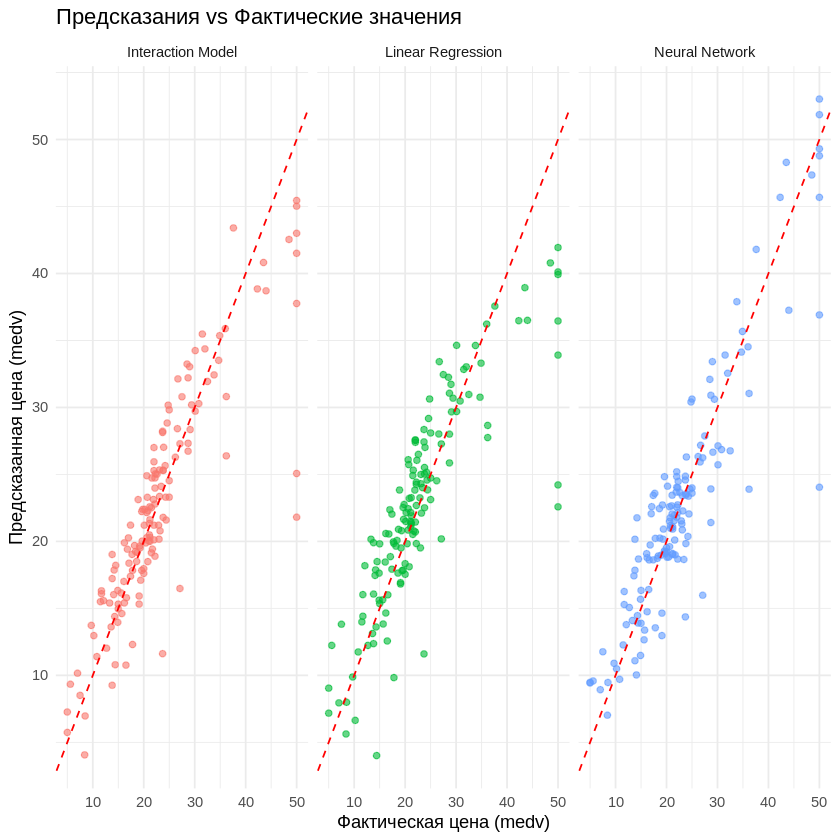

In [6]:

# СРАВНЕНИЕ МОДЕЛЕЙ

# Создаем таблицу сравнения
results_comparison <- data.frame(
  Model = c("Linear Regression", "Regression with Interactions", "Neural Network"),
  RMSE = c(lm_rmse, int_rmse, nn_rmse),
  MAE = c(lm_mae, int_mae, nn_mae),
  R_squared = c(lm_r2, int_r2, nn_r2)
)

print(results_comparison)

# Визуализация сравнения моделей
results_long <- results_comparison %>%
  pivot_longer(cols = c(RMSE, MAE, R_squared),
               names_to = "Metric",
               values_to = "Value")

ggplot(results_long, aes(x = Model, y = Value, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ Metric, scales = "free_y") +
  labs(title = "Сравнение эффективности моделей",
       y = "Значение метрики",
       x = "Модель") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Визуализация предсказаний vs фактические значения
predictions_df <- data.frame(
  Actual = rep(test_data$medv, 3),
  Predicted = c(lm_predictions, int_predictions, nn_predictions),
  Model = rep(c("Linear Regression", "Interaction Model", "Neural Network"),
              each = nrow(test_data))
)

ggplot(predictions_df, aes(x = Actual, y = Predicted, color = Model)) +
  geom_point(alpha = 0.6) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  facet_wrap(~ Model, ncol = 3) +
  labs(title = "Предсказания vs Фактические значения",
       x = "Фактическая цена (medv)",
       y = "Предсказанная цена (medv)") +
  theme_minimal() +
  theme(legend.position = "none")

Нейронов: 3 | RMSE: 4.473 
Нейронов: 5 | RMSE: 3.608 
Нейронов: 7 | RMSE: 4.055 
Нейронов: 9 | RMSE: 4.27 
Нейронов: 11 | RMSE: 4.519 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


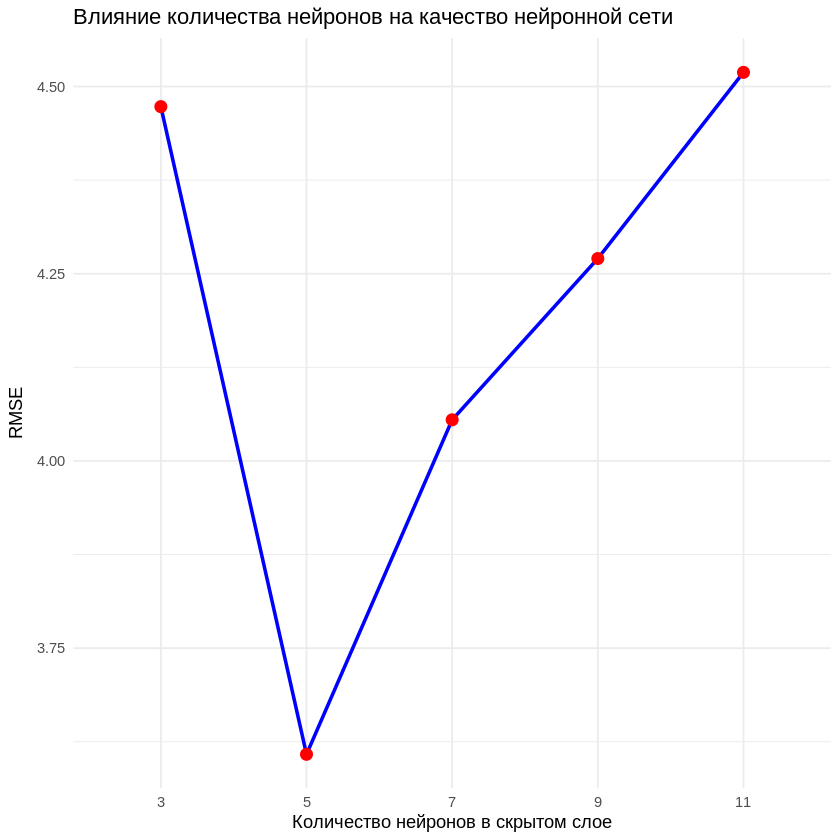

In [7]:

# КРОСС-ВАЛИДАЦИЯ ДЛЯ НЕЙРОННОЙ СЕТИ

# Простая кросс-валидация для выбора количества нейронов
cv_results <- data.frame(Neurons = integer(), RMSE = numeric())

# Тестируем разное количество нейронов в скрытом слое
for (neurons in c(3, 5, 7, 9, 11)) {
  set.seed(123)
  nn_cv <- neuralnet(
    nn_formula,
    data = train_scaled,
    hidden = neurons,
    linear.output = TRUE,
    threshold = 0.01,
    stepmax = 1e5
  )

  predictions_cv_scaled <- predict(nn_cv, test_scaled)
  predictions_cv <- predictions_cv_scaled * medv_sd + medv_mean
  rmse_cv <- RMSE(predictions_cv, test_data$medv)

  cv_results <- rbind(cv_results,
                      data.frame(Neurons = neurons, RMSE = rmse_cv))

  cat(paste("Нейронов:", neurons, "| RMSE:", round(rmse_cv, 3), "\n"))
}

# Визуализация результатов кросс-валидации
ggplot(cv_results, aes(x = as.factor(Neurons), y = RMSE, group = 1)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 3) +
  labs(title = "Влияние количества нейронов на качество нейронной сети",
       x = "Количество нейронов в скрытом слое",
       y = "RMSE") +
  theme_minimal()

In [ ]:

cat("Лучшая модель:", results_comparison$Model[which.min(results_comparison$RMSE)], "\n")
cat("Разница в RMSE между моделями:",
    round(max(results_comparison$RMSE) - min(results_comparison$RMSE), 3), "\n")